In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import numpy as np

#plt.rcParams["figure.figsize"] = (4,3)

In [2]:
blue1 = "#0B64D4"
blue2 = "#0CB2F6"

blue3 = "#0DB9FA"

magenta1 = "#A80DFA"
magenta2 = "#CF0BDE"

red1 = "#FA4A0D"
red2 = "#DE600B"

orange1 = "#FAA30D"
orange2 = "#F5CD00"

green1 = "#0DFA2C"
green2 = "#00F4A9"

ground_truth = "/gazebo/model_states/pose[1]/position/x:y"
odometry_filtered = "/odometry/filtered/pose/pose/position/x:y"

# https://www.clearpathrobotics.com/assets/guides/kinetic/husky/InterfacingWithHusky.html

## Ground truth vs odometry filtered
### Ground truth
From gazebo topic `/gazebo/model_states`
### Odometry Filtered
From husky topic `/odemtry/filtered`

Source: `ekf_localization_node`

Description: Fused odometry estimate (encoders and IMU)

https://www.clearpathrobotics.com/assets/guides/kinetic/husky/InterfacingWithHusky.html

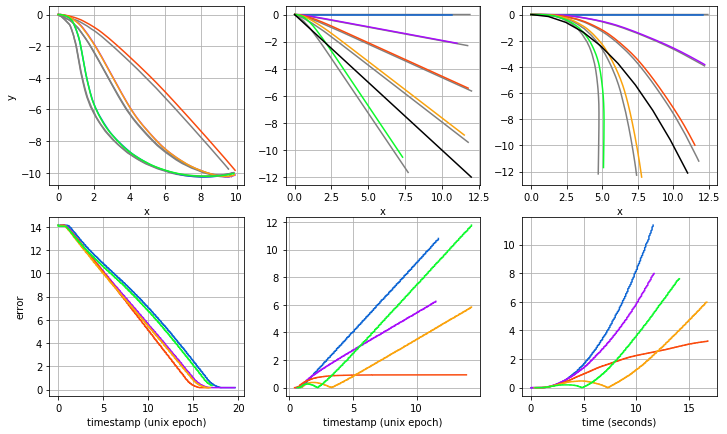

In [73]:
ms_11_111 = pd.read_csv(r'problem11_111_ms_1.csv')
of_11_111 = pd.read_csv(r'problem11_111_of_1.csv')
ms_11_1105 = pd.read_csv(r'problem11_1105_ms_1.csv')
of_11_1105 = pd.read_csv(r'problem11_1105_of_1.csv')
ms_11_110 = pd.read_csv(r'problem11_110_ms_1.csv')
of_11_110 = pd.read_csv(r'problem11_110_of_1.csv')
ms_11_11_05 = pd.read_csv(r'problem11_11-05_ms_1.csv')
of_11_11_05 = pd.read_csv(r'problem11_11-05_of_1.csv')
ms_11_11_1 = pd.read_csv(r'problem11_11-1_ms_1.csv')
of_11_11_1 = pd.read_csv(r'problem11_11-1_of_1.csv')

ms_12_111 = pd.read_csv(r'problem12_n1_111_ms_2.csv')
of_12_111 = pd.read_csv(r'problem12_n1_111_of_2.csv')
ms_12_1105 = pd.read_csv(r'problem12_n1_1105_ms_2.csv')
of_12_1105 = pd.read_csv(r'problem12_n1_1105_of_2.csv')
ms_12_110 = pd.read_csv(r'problem12_n1_110_ms_2.csv')
of_12_110 = pd.read_csv(r'problem12_n1_110_of_2.csv')
ms_12_11_05 = pd.read_csv(r'problem12_n1_11n05_ms_2.csv')
of_12_11_05 = pd.read_csv(r'problem12_n1_11n05_of_2.csv')
#ms_12_11_06 = pd.read_csv(r'problem12_n1_11n06_ms_2.csv')
#of_12_11_06 = pd.read_csv(r'problem12_n1_11n06_of_2.csv')
ms_12_11_1 = pd.read_csv(r'problem12_n1_11n1_ms_2.csv')
of_12_11_1 = pd.read_csv(r'problem12_n1_11n1_of_2.csv')

ms_13_111 = pd.read_csv(r'problem13_n01_111_ms_3.csv')
of_13_111 = pd.read_csv(r'problem13_n01_111_of_3.csv')
ms_13_1105 = pd.read_csv(r'problem13_n01_1105_ms_3.csv')
of_13_1105 = pd.read_csv(r'problem13_n01_1105_of_3.csv')
ms_13_110 = pd.read_csv(r'problem13_n01_110_ms_3.csv')
of_13_110 = pd.read_csv(r'problem13_n01_110_of_3.csv')
ms_13_11_05 = pd.read_csv(r'problem13_n01_11n05_ms_3.csv')
of_13_11_05 = pd.read_csv(r'problem13_n01_11n05_of_3.csv')
ms_13_11_1 = pd.read_csv(r'problem13_n01_11n1_ms_3.csv')
of_13_11_1 = pd.read_csv(r'problem13_n01_11n1_of_3.csv')

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=[10,6])
fig.tight_layout()

ax1.plot(ms_11_111.x, ms_11_111.y, color="grey")
ax1.plot(of_11_111.x, of_11_111.y, color=blue1)
ax1.plot(ms_11_1105.x, ms_11_1105.y, color="grey")
ax1.plot(of_11_1105.x, of_11_1105.y, color=magenta1)
ax1.plot(ms_11_110.x, ms_11_110.y, color="grey")
ax1.plot(of_11_110.x, of_11_110.y, color=red1)
ax1.plot(ms_11_11_05.x, ms_11_11_05.y, color="grey")
ax1.plot(of_11_11_05.x, of_11_11_05.y, color=orange1)
ax1.plot(ms_11_11_1.x, ms_11_11_1.y, color="grey")
ax1.plot(of_11_11_1.x, of_11_11_1.y, color=green1)
ax1.set_ylabel("y")
ax1.set_xlabel("x")
ax1.grid()

a = -1
def first_order(x):
    return a * x
first_order_x = np.linspace(0, 12, 10)
first_order_y = first_order(first_order_x)

ax2.plot(ms_12_111.x, ms_12_111.y, color="grey")
ax2.plot(of_12_111.x, of_12_111.y, color=blue1)
ax2.plot(ms_12_1105.x, ms_12_1105.y, color="grey")
ax2.plot(of_12_1105.x, of_12_1105.y, color=magenta1)
ax2.plot(ms_12_110.x, ms_12_110.y, color="grey")
ax2.plot(of_12_110.x, of_12_110.y, color=red1)
ax2.plot(ms_12_11_05.x, ms_12_11_05.y, color="grey")
ax2.plot(of_12_11_05.x, of_12_11_05.y, color=orange1)
#ax2.plot(ms_12_11_06.x, ms_12_11_06.y, color="grey")
#ax2.plot(of_12_11_06.x, of_12_11_06.y, color=blue3)
ax2.plot(ms_12_11_1.x, ms_12_11_1.y, color="grey")
ax2.plot(of_12_11_1.x, of_12_11_1.y, color=green1)
ax2.plot(first_order_x, first_order_y, color="black")
ax2.set_xlabel("x")
ax2.grid()

a = -0.1
def second_order(x):
    return a * x**2
second_order_x = np.linspace(0, 11, 10)
second_order_y = second_order(second_order_x)

ax3.plot(ms_13_111.x, ms_13_111.y, color="grey")
ax3.plot(of_13_111.x, of_13_111.y, color=blue1)
ax3.plot(ms_13_1105.x, ms_13_1105.y, color="grey")
ax3.plot(of_13_1105.x, of_13_1105.y, color=magenta1)
ax3.plot(ms_13_110.x, ms_13_110.y, color="grey")
ax3.plot(of_13_110.x, of_13_110.y, color=red1)
ax3.plot(ms_13_11_05.x, ms_13_11_05.y, color="grey")
ax3.plot(of_13_11_05.x, of_13_11_05.y, color=orange1)
ax3.plot(ms_13_11_1.x, ms_13_11_1.y, color="grey")
ax3.plot(of_13_11_1.x, of_13_11_1.y, color=green1)
ax3.plot(second_order_x, second_order_y, color="black")
ax3.set_xlabel("x")
ax3.grid()

rho_11_111 = pd.read_csv(r'problem11_111_rho_1.csv')
rho_11_1105 = pd.read_csv(r'problem11_1105_rho_1.csv')
rho_11_110 = pd.read_csv(r'problem11_110_rho_1.csv')
rho_11_11_05 = pd.read_csv(r'problem11_11-05_rho_1.csv')
rho_11_11_1 = pd.read_csv(r'problem11_11-1_rho_1.csv')

rho_12_111 = pd.read_csv(r'problem12_n1_111_rho_2.csv')
rho_12_1105 = pd.read_csv(r'problem12_n1_1105_rho_2.csv')
rho_12_110 = pd.read_csv(r'problem12_n1_110_rho_2.csv')
rho_12_11_05 = pd.read_csv(r'problem12_n1_11n05_rho_2.csv')
rho_12_11_1 = pd.read_csv(r'problem12_n1_11n1_rho_2.csv')

rho_13_111 = pd.read_csv(r'problem13_n01_111_rho_3.csv')
rho_13_1105 = pd.read_csv(r'problem13_n01_1105_rho_3.csv')
rho_13_110 = pd.read_csv(r'problem13_n01_110_rho_3.csv')
rho_13_11_05 = pd.read_csv(r'problem13_n01_11n05_rho_3.csv')
rho_13_11_1 = pd.read_csv(r'problem13_n01_11n1_rho_3.csv')


#fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#fig.set_figheight(3)
#fig.set_figwidth(10)

ax4.plot(rho_11_111.timestamp/10**9, rho_11_111.error, color=blue1)
ax4.plot(rho_11_1105.timestamp/10**9, rho_11_1105.error, color=magenta1)
ax4.plot(rho_11_110.timestamp/10**9, rho_11_110.error, color=red1)
ax4.plot(rho_11_11_05.timestamp/10**9, rho_11_11_05.error, color=orange1)
ax4.plot(rho_11_11_1.timestamp/10**9, rho_11_11_1.error, color=green1)
ax4.set_ylabel("error")
ax4.set_xlabel("timestamp (unix epoch)")
ax4.grid()

ax5.plot(rho_12_111.timestamp/10**9, rho_12_111.error, color=blue1)
ax5.plot(rho_12_1105.timestamp/10**9, rho_12_1105.error, color=magenta1)
ax5.plot(rho_12_110.timestamp/10**9, rho_12_110.error, color=red1)
ax5.plot(rho_12_11_05.timestamp/10**9, rho_12_11_05.error, color=orange1)
ax5.plot(rho_12_11_1.timestamp/10**9, rho_12_11_1.error, color=green1)
ax5.set_xlabel("timestamp (unix epoch)")
ax5.grid()

ax6.plot(rho_13_111.timestamp/10**9, rho_13_111.error, color=blue1)
ax6.plot(rho_13_1105.timestamp/10**9, rho_13_1105.error, color=magenta1)
ax6.plot(rho_13_110.timestamp/10**9, rho_13_110.error, color=red1)
ax6.plot(rho_13_11_05.timestamp/10**9, rho_13_11_05.error, color=orange1)
ax6.plot(rho_13_11_1.timestamp/10**9, rho_13_11_1.error, color=green1)
ax6.set_xlabel("time (seconds)")
ax6.grid()


"""
plt.legend(["error vs time\nKρ = 1, Kα = 1, Kβ = 1",
            "error vs time\nKρ = 1, Kα = 1, Kβ = 0.5",
            "error vs time\nKρ = 1, Kα = 1, Kβ = 0.2",
            "error vs time\nKρ = 1, Kα = 1, Kβ = 0",])
"""
#plt.xlabel("time")
#plt.ylabel("error (rho)")
plt.savefig("problem1-multiplot.svg", format="svg")
plt.show()

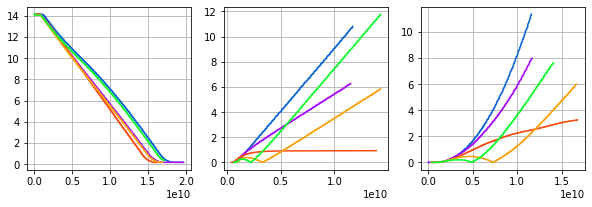

In [4]:
rho_11_111 = pd.read_csv(r'problem11_111_rho_1.csv')
rho_11_1105 = pd.read_csv(r'problem11_1105_rho_1.csv')
rho_11_110 = pd.read_csv(r'problem11_110_rho_1.csv')
rho_11_11_05 = pd.read_csv(r'problem11_11-05_rho_1.csv')
rho_11_11_1 = pd.read_csv(r'problem11_11-1_rho_1.csv')

rho_12_111 = pd.read_csv(r'problem12_n1_111_rho_2.csv')
rho_12_1105 = pd.read_csv(r'problem12_n1_1105_rho_2.csv')
rho_12_110 = pd.read_csv(r'problem12_n1_110_rho_2.csv')
rho_12_11_05 = pd.read_csv(r'problem12_n1_11n05_rho_2.csv')
rho_12_11_1 = pd.read_csv(r'problem12_n1_11n1_rho_2.csv')

rho_13_111 = pd.read_csv(r'problem13_n01_111_rho_3.csv')
rho_13_1105 = pd.read_csv(r'problem13_n01_1105_rho_3.csv')
rho_13_110 = pd.read_csv(r'problem13_n01_110_rho_3.csv')
rho_13_11_05 = pd.read_csv(r'problem13_n01_11n05_rho_3.csv')
rho_13_11_1 = pd.read_csv(r'problem13_n01_11n1_rho_3.csv')

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(3)
fig.set_figwidth(10)

ax1.plot(rho_11_111.timestamp, rho_11_111.error, color=blue1)
ax1.plot(rho_11_1105.timestamp, rho_11_1105.error, color=magenta1)
ax1.plot(rho_11_110.timestamp, rho_11_110.error, color=red1)
ax1.plot(rho_11_11_05.timestamp, rho_11_11_05.error, color=orange1)
ax1.plot(rho_11_11_1.timestamp, rho_11_11_1.error, color=green1)
ax1.grid()

ax2.plot(rho_12_111.timestamp, rho_12_111.error, color=blue1)
ax2.plot(rho_12_1105.timestamp, rho_12_1105.error, color=magenta1)
ax2.plot(rho_12_110.timestamp, rho_12_110.error, color=red1)
ax2.plot(rho_12_11_05.timestamp, rho_12_11_05.error, color=orange1)
ax2.plot(rho_12_11_1.timestamp, rho_12_11_1.error, color=green1)
ax2.grid()

ax3.plot(rho_13_111.timestamp, rho_13_111.error, color=blue1)
ax3.plot(rho_13_1105.timestamp, rho_13_1105.error, color=magenta1)
ax3.plot(rho_13_110.timestamp, rho_13_110.error, color=red1)
ax3.plot(rho_13_11_05.timestamp, rho_13_11_05.error, color=orange1)
ax3.plot(rho_13_11_1.timestamp, rho_13_11_1.error, color=green1)
ax3.grid()
"""
plt.legend(["error vs time\nKρ = 1, Kα = 1, Kβ = 1",
            "error vs time\nKρ = 1, Kα = 1, Kβ = 0.5",
            "error vs time\nKρ = 1, Kα = 1, Kβ = 0.2",
            "error vs time\nKρ = 1, Kα = 1, Kβ = 0",])
"""
#plt.xlabel("time")
#plt.ylabel("error (rho)")
#plt.savefig("problem1-rho.svg", format="svg")
plt.show()

In [57]:
"""
def interpolate(inp, fi):
    i, f = int(fi // 1), fi % 1  # Split floating-point index into whole & fractional parts.
    j = i+1 if f > 0 else i      # Avoid index error.
    return (1-f) * inp[i] + f * inp[j]

len_input = len(of.x.values)
len_output = len(ms.x.values)
delta_len = (len_input - 1) / (len_output - 1)

of_interpolated = [
    [
        interpolate(of.timestamp.values, i * delta_len),
        interpolate(of.x.values, i * delta_len),
        interpolate(of.y.values, i * delta_len)
    ] for i in range(len_output)
]
"""

"""
zlist = list(zip(ms.values.tolist(), of_interpolated))

(ms_time_n, ms_x_n, ms_y_n), (of_time_n, of_x_n, of_y_n) = zlist[0]
print(ms_time_n)
"""
"""
error = np.array([
    [
        (of_time_n + ms_time_n) / 2,
        np.sqrt((of_x_n - ms_x_n)**2 + (of_y_n - ms_y_n)**2)
    ] for (ms_time_n, ms_x_n, ms_y_n), (of_time_n, of_x_n, of_y_n) in zip(ms.values.tolist(), of_interpolated)
])
"""

'\nerror = np.array([\n    [\n        (of_time_n + ms_time_n) / 2,\n        np.sqrt((of_x_n - ms_x_n)**2 + (of_y_n - ms_y_n)**2)\n    ] for (ms_time_n, ms_x_n, ms_y_n), (of_time_n, of_x_n, of_y_n) in zip(ms.values.tolist(), of_interpolated)\n])\n'

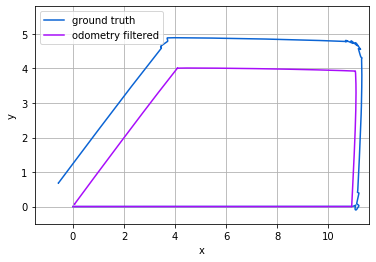

In [84]:
ms = pd.read_csv(r'problem2_ms_3.csv')
of = pd.read_csv(r'problem2_of_3.csv')

plt.plot(ms.x, ms.y, color=blue1)
plt.plot(of.x, of.y, color=magenta1)
plt.ylim([-0.5,5.8])
plt.xlim([-1.5,11.6])
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["ground truth", "odometry filtered"], loc='upper left')
# /gazebo/model_states
# /odometry/filtered
plt.savefig("problem2-position.svg", format="svg")
plt.show()

In [86]:
yaw_data = pd.read_csv(r'yaw_angles.txt')
ms = pd.DataFrame(yaw_data, columns=['model_states_recceipt_time', 'model_states_yaw'])
of = pd.DataFrame(yaw_data, columns=['odometry_filtered_recceipt_time', 'odometry_filtered_yaw'])

nan_value = float("NaN")
of.replace(" ", nan_value, inplace=True)
of.dropna(inplace=True)

of = of.astype(float)
of.dtypes

odometry_filtered_recceipt_time    float64
odometry_filtered_yaw              float64
dtype: object

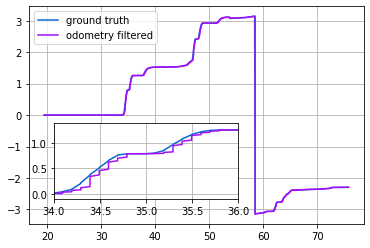

In [88]:
fig, ax = plt.subplots(1,1, figsize=[6,4])
axins = inset_axes(ax, width="55%", height="35%", loc=3, borderpad=2.5)
axins.tick_params(labelleft=True, labelbottom=True)

ax.plot(ms.model_states_recceipt_time, ms.model_states_yaw, color=blue1)
ax.plot(of.odometry_filtered_recceipt_time, of.odometry_filtered_yaw, color=magenta1)
axins.plot(ms.model_states_recceipt_time, ms.model_states_yaw, color=blue1)
axins.plot(of.odometry_filtered_recceipt_time, of.odometry_filtered_yaw, color=magenta1)
axins.set_xlim(34, 36)
axins.set_ylim(-0.1, 1.4)
axins.grid()
ax.grid()
#ax.xlabel("time")
#ax.ylabel("yaw (radians)")
ax.legend(["ground truth", "odometry filtered"], loc='upper left')
# /gazebo/model_states/pose[2]/orientation/z
# /odometry/filtered/post/pose/orientation/z
plt.savefig("problem2-yaw.svg", format="svg")
plt.show()